# Separación train/test y prueba de carga de datos


En este Notebook se extraerán del set total (train + val en Kaggle) el conjunto de test. </br>
También se harán pruebas para comprobar que los datos se cargan correctamente


In [2]:
import sys

sys.path.append("../")  # Add the parent directory to the Python path

In [4]:
from src.data.data_loader import data_loader, data_loader_test

# from src.data.move_to_test import move_images_to_test
import tensorflow as tf

## 1. Separación train/test


Se ha creado un script move_images_to_test, este script se ejecuta una única vez en el proyecto, y divide los sets de train+val y test en diferentes carpetas en el SO.


In [ ]:
# Example usage:
root_folder = "data/train"
percentage = 0.25
# NOTA: comentado para no ejecutar la separación de nuevo por error
# move_images_to_test(root_folder, percentage)

## 2. Test de carga de los datos


Se emplea una función data_loader construida en un modulo separado para cargar los datos. La ventaja de aislar esta función en un modulo es la de poder reutilizarla en otros scripts y notebooks del proyecto.

### Argumentos de la función:

- `data_dir` (str): La ruta al directorio que contiene subdirectorios con imágenes.
- `target_size` (tuple): El tamaño al que se redimensionarán las imágenes (alto, ancho). Por defecto, se establece en (150, 150).
- `batch_size` (int): El tamaño del lote para entrenamiento. Por defecto, se establece en 32.
- `is_shuffle` (bool): Un indicador que especifica si se debe mezclar el conjunto de datos antes de cargarlo. Por defecto, se establece en True.
- `validation_split` (float): La fracción del conjunto de datos que se utilizará como conjunto de validación. Por defecto, se establece en 0.2.

### Retorna:

La función `data_loader` devuelve una instancia de `ImageDataGenerator` para cargar y aumentar imágenes.

```python
def data_loader(data_dir: str, target_size: Tuple[int, int] = (150, 150), batch_size: int = 32, is_shuffle: bool = True, validation_split=0.2):
    ...
```


In [ ]:
train_data, val_data = data_loader("../data/train", (150, 150), batch_size=128)

### Argumentos de la función:

- `data_dir` (str): La ruta al directorio que contiene subdirectorios con imágenes.
- `target_size` (Tuple[int, int]): El tamaño al que se redimensionarán las imágenes (alto, ancho).

### Retorna:

La función `create_test_data_loader` devuelve una instancia de `ImageDataGenerator` que se puede utilizar para cargar y aumentar imágenes durante el proceso de test del modelo.

```python
def create_test_data_loader(data_dir: str, target_size: Tuple[int, int]):
    ...
```


In [5]:
test_data = data_loader_test("../data/test", (150, 150))

Found 4257 files belonging to 6 classes.


### Explorar algunas imágenes


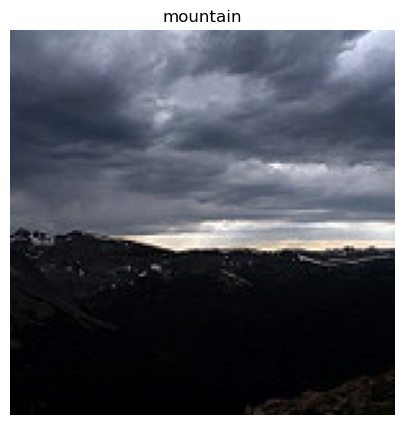

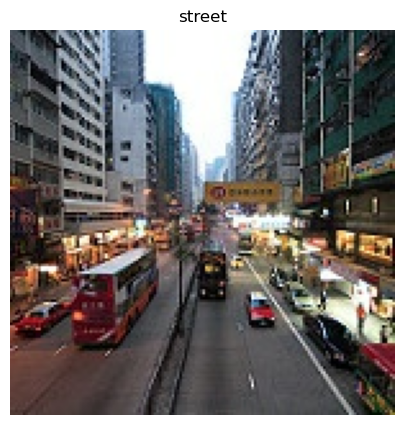

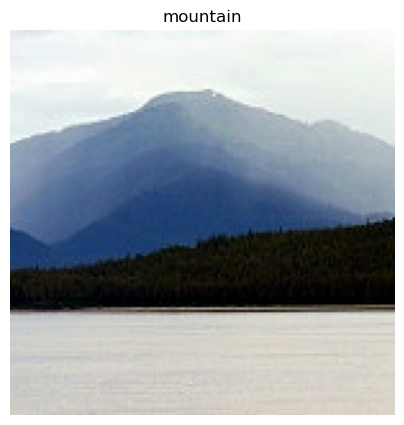

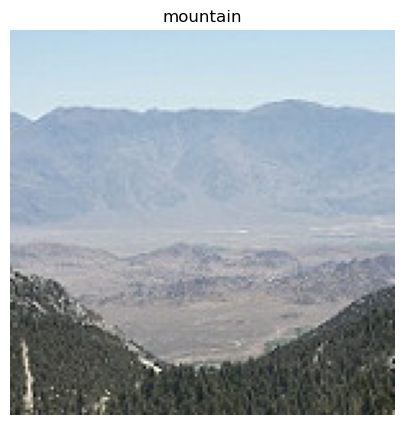

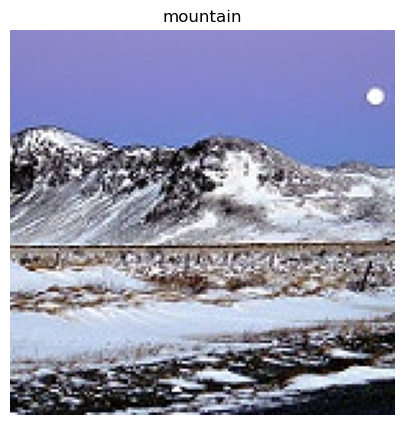

In [46]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in test_data.take(1):  # primer batch
    class_labels = test_data.class_names

    for i in range(5):
        plt.figure(figsize=(5, 5))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_labels[np.argmax(labels[i])])
        plt.axis("off")
        plt.show()